In [18]:
# Analyse for the MP.7 Performance Evaluation 1

#Count the number of keypoints on the preceding vehicle for all 10 images 
#and take note of the distribution of their neighborhood size. 
#Do this for all the detectors you have implemented.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
#  read the data for detector
def processDetector(name):
    df = pd.read_csv("../analyse_data/detector/"+name+".csv")
    print(name + "detector detects "+str(df.shape[0])+" keypoints on the preceding vehicle for all 10 images.")
    
    # show the distribution of neighborhood size
    plt.figure()
    sns.distplot(df['neighbour_size']);
    plt.xlabel("neighbour_size")
    plt.ylabel("distribution")
    plt.title("distribution of neighbour_size of "+name+" detector")
    fig = plt.gcf()
    fig.savefig("../analyse_data/detector/"+name+".png")
    fig.show()
    return df.shape[0]

SHITOMASIdetector detects 1179 keypoints on the preceding vehicle for all 10 images.
FASTdetector detects 1491 keypoints on the preceding vehicle for all 10 images.
SIFTdetector detects 1387 keypoints on the preceding vehicle for all 10 images.
HARRISdetector detects 560 keypoints on the preceding vehicle for all 10 images.
BRISKdetector detects 2762 keypoints on the preceding vehicle for all 10 images.


/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/gaspard/anaconda3/lib/python3.7/site-packages/matp

ORBdetector detects 1161 keypoints on the preceding vehicle for all 10 images.
AKAZEdetector detects 1670 keypoints on the preceding vehicle for all 10 images.


/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/gaspard/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


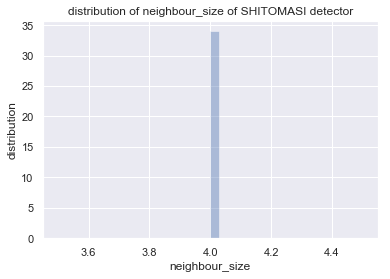

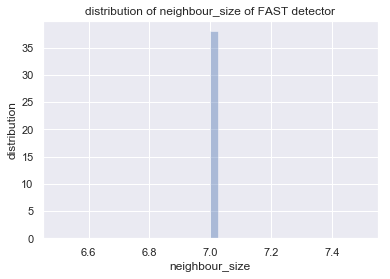

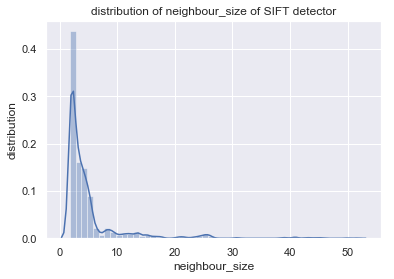

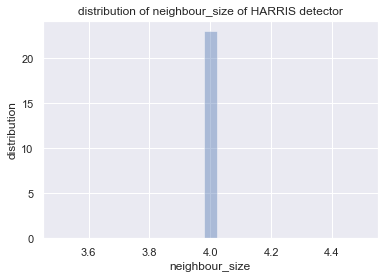

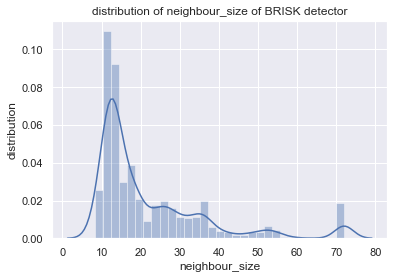

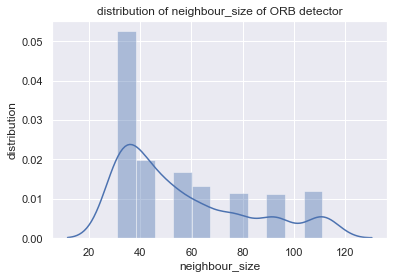

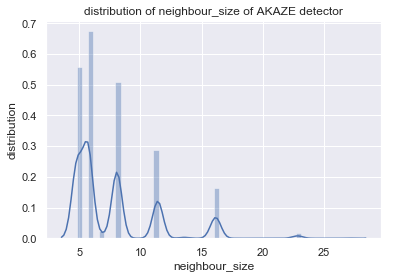

In [20]:
keypoint_df = pd.DataFrame({"SHITOMASI":[0], "FAST":[0], "SIFT":[0], "HARRIS":[0], "BRISK":[0], "ORB":[0], "AKAZE":[0]})
for name in ["SHITOMASI", "FAST", "SIFT", "HARRIS", "BRISK", "ORB", "AKAZE"]:
    keypoint_df[name] = processDetector(name)

In [22]:
keypoint_df

,SHITOMASI,FAST,SIFT,HARRIS,BRISK,ORB,AKAZE
0,1179,1491,1387,560,2762,1161,1670


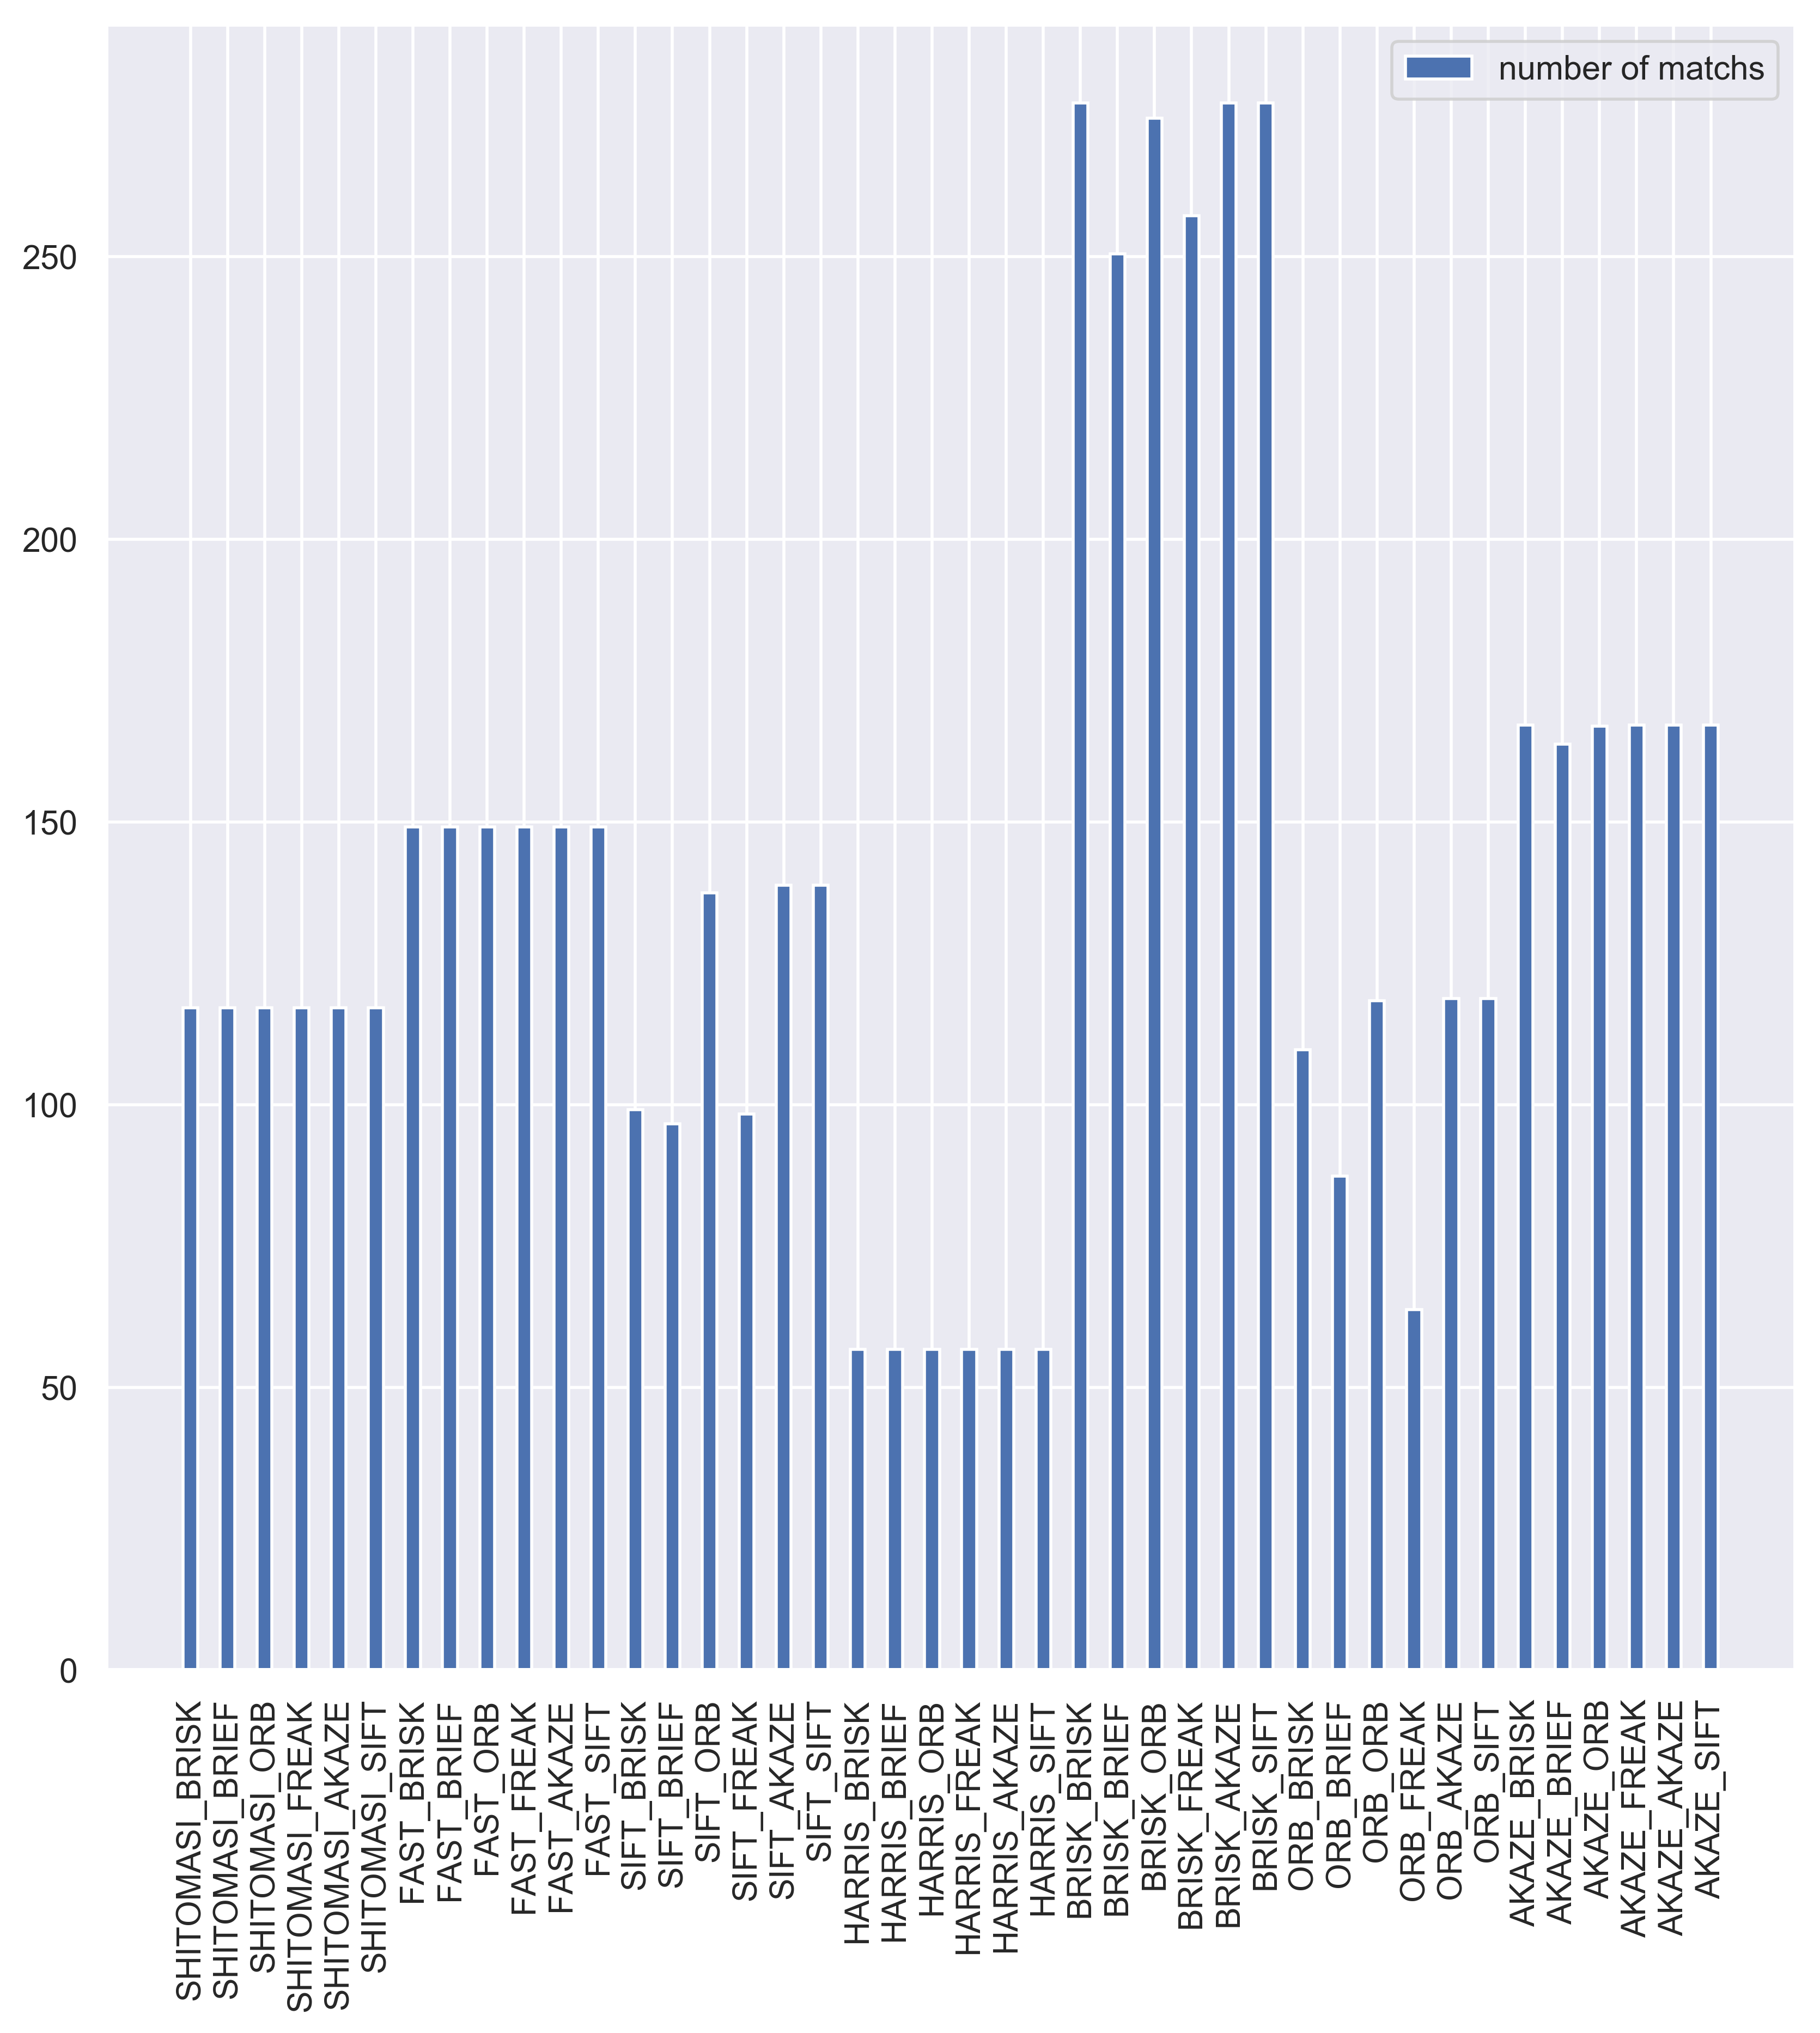

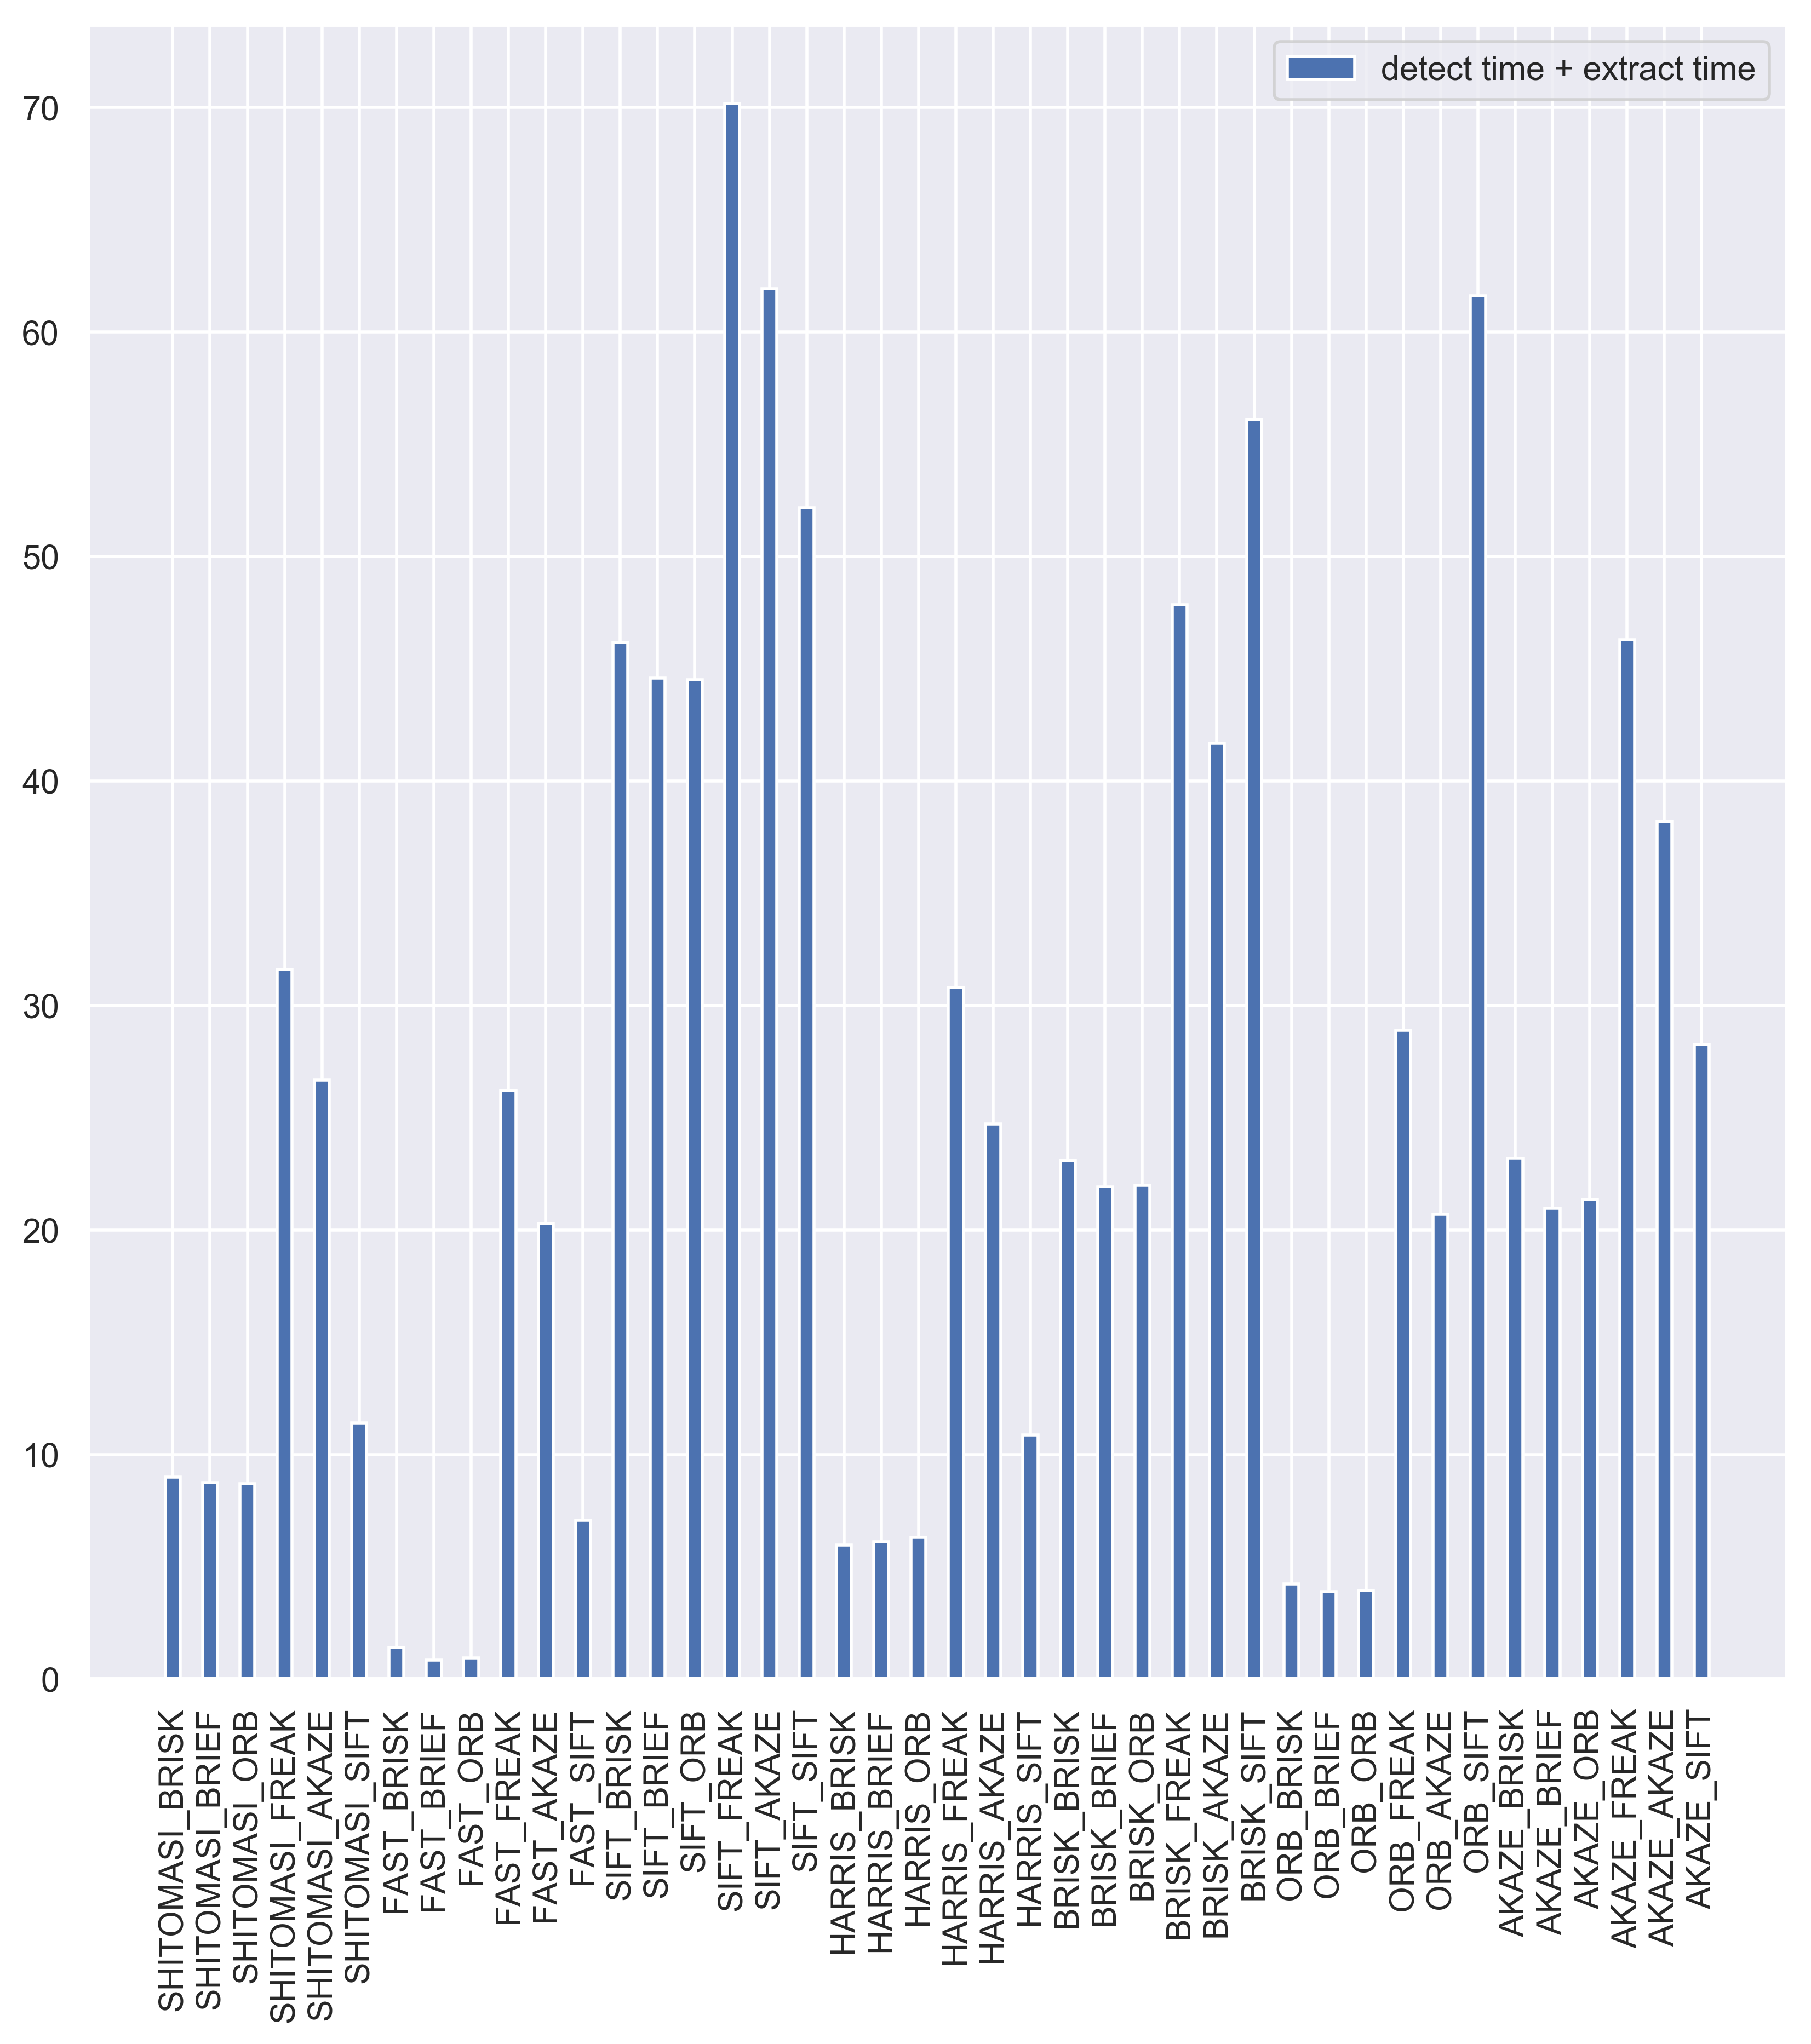

In [56]:
# MP.8 Performance Evaluation 2
# Count the number of matched keypoints for all 10 images using all possible combinations of detectors and descriptors. 
def processMachedPointsAndTime(det_name, desc_name):
    
    df = pd.read_csv("../analyse_data/combination/"+det_name+"_"+desc_name+".csv")
    match_point = df["mached_keypoints"].sum() / 9.0
    detect_time = df["detect_time"].sum() / 9.0
    extract_time = df["extract_time"].sum() / 9.0
    return match_point, detect_time, extract_time

det_names = ["SHITOMASI", "FAST", "SIFT", "HARRIS", "BRISK", "ORB", "AKAZE"]
desc_names = ["BRISK", "BRIEF", "ORB", "FREAK", "AKAZE", "SIFT"]

combine_names = []
combine_matchs = []
combine_time = []

time_df = pd.DataFrame()
for det_name in det_names:
    for desc_name in desc_names:
        match_point, detect_time, extract_time = processMachedPointsAndTime(det_name, desc_name)
        combine_names.append(det_name + "_" + desc_name)
        combine_matchs.append(match_point)
        combine_time.append(detect_time + extract_time)
        time_df[det_name + "_" + desc_name] = [detect_time + extract_time]
        
    
fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.bar(combine_names, combine_matchs, label="number of matchs", width = 0.4)
plt.xticks(rotation='vertical')
ax.legend()
fig.savefig("../analyse_data/combination/matched_points.png")
plt.show()

fig, ax = plt.subplots(figsize=(10,10), dpi=400)
ax.bar(combine_names, combine_time, label="detect time + extract time", width = 0.4)
plt.xticks(rotation='vertical')
ax.legend()
fig.savefig("../analyse_data/combination/time.png")
plt.show()


time_df.to_csv("../analyse_data/combination/time.csv")


In [57]:
time_df

,SHITOMASI_BRISK,SHITOMASI_BRIEF,SHITOMASI_ORB,SHITOMASI_FREAK,SHITOMASI_AKAZE,SHITOMASI_SIFT,FAST_BRISK,FAST_BRIEF,FAST_ORB,FAST_FREAK,...,ORB_ORB,ORB_FREAK,ORB_AKAZE,ORB_SIFT,AKAZE_BRISK,AKAZE_BRIEF,AKAZE_ORB,AKAZE_FREAK,AKAZE_AKAZE,AKAZE_SIFT
0,8.981333,8.741793,8.69993,31.601471,26.66938,11.409977,1.410769,0.842526,0.937709,26.22212,...,3.949769,28.902773,20.693659,61.601811,23.191528,20.968997,21.36249,46.301133,38.193956,28.260284
